# Assignment 4

## Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

house_price = pd.read_excel("monthlyHousePricesUK.xls", sheet_name = 'monthlyHousePricesUK').set_index("Date")

ftse = pd.read_excel("FTSE.xls", sheet_name = "FTSE").set_index("Date")
ftse.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-01,6724.399902,6955.299805,6615.799805,6781.500000,6781.500000,15725368400
2016-09-01,6781.500000,6941.100098,6654.500000,6899.299805,6899.299805,18132999100
2016-10-01,6899.299805,7129.799805,6898.100098,6954.200195,6954.200195,18708869600
2016-11-01,6954.200195,6997.299805,6676.600098,6783.799805,6783.799805,20197573900
2016-12-01,6783.799805,7142.799805,6678.700195,7142.799805,7142.799805,14991595900


In [2]:
house_price.head()

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
Date,,,,,,
1991-01-01,53052,105.8,107.1,NaN,NaN,NaN
1991-02-01,53497,106.7,107.5,0.003,NaN,NaN
1991-03-01,52893,105.5,106.5,-0.009,NaN,NaN
1991-04-01,53677,107.1,107.1,0.006,NaN,NaN
1991-05-01,54386,108.5,107.3,0.001,NaN,NaN


In [3]:
data = ftse[["Adj Close"]].merge(house_price[["Average House Price"]], how = 'inner', left_index = True, right_index = True)

In [4]:
data['house_returns'] = (data["Average House Price"]/data["Average House Price"].shift())-1
data['ftse_returns'] = (data["Adj Close"]/data["Adj Close"].shift())-1

In [5]:
data.dropna(inplace = True)

In [6]:
y = data['ftse_returns']
x = data['house_returns']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("Correlaion coef.: %f" % r_value)

slope: 0.104010    intercept: 0.004174
Correlaion coef.: 0.029753


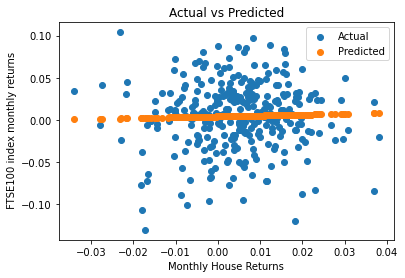

In [7]:
plt.scatter(x, y, label = "Actual")
plt.scatter(x, (intercept + slope*x), label = "Predicted")
plt.xlabel("Monthly House Returns")
plt.ylabel(" FTSE100 index monthly returns")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

In [8]:
p_value

0.6011814676048335

## Question 2

In [9]:
college_data = pd.read_csv("College.csv")[["Apps", "Enroll", "Outstate", "Top10perc", "Top25perc", "Grad.Rate"]]

In [10]:
college_data.corr()

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
Apps,1.000000,0.846822,0.050159,0.338834,0.351640,0.146755
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745,-0.022341
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394,0.571290
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995,0.494989
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000,0.477281
Grad.Rate,0.146755,-0.022341,0.571290,0.494989,0.477281,1.000000


In [11]:
import statsmodels.api as sm



def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    bic = {}
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            bic[model.bic] = included+[new_column]
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included, bic

In [12]:
y = college_data[["Grad.Rate"]]
X = college_data[["Apps", "Enroll", "Outstate", "Top10perc", "Top25perc"]]

a, b = forward_regression(X, y, 0.05, verbose = True)

Add  Outstate                       with p-value 1.62893e-68
Add  Top25perc                      with p-value 4.69503e-15


<ipython-input-11-557c9d796130>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [13]:
b[np.min(list(b.keys()))], np.min(list(b.keys()))

(['Outstate', 'Top25perc'], 6274.3329824422635)

In [14]:
y = college_data[["Grad.Rate"]]
X = college_data[["Apps", "Enroll", "Outstate", "Top10perc", "Top25perc"]]
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     97.00
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           2.73e-79
Time:                        23:50:38   Log-Likelihood:                -3121.9
No. Observations:                 777   AIC:                             6256.
Df Residuals:                     771   BIC:                             6284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8962      2.137     16.800      0.000      31.702      40.091
Apps           0.0008      0.000      3.005      0.003       0.000       0.001
Enroll        -0.0030      0.001     -2.828      0.005      -0.005      -0.001
Outstate       0.0017      0.000     11.124      0.000       0.001       0.002
Top10perc      0.0493      0.065      0.762      0.446      -0.078       0.176
Top25perc      0.1813      0.055      3.312      0.001       0.074       0.289
==============================================================================
Omnibus:                       23.498   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.256
Skew:                           0.210   Prob(JB):                     1.10e-09
Kurtosis:                       4.048   Cond. No.                     5.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y= college_data[["Grad.Rate"]]
X = college_data[['Outstate', 'Top25perc']]
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.82e-80
Time:                        23:50:38   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0860      1.607     20.593      0.000      29.932      36.240
Outstate       0.0019      0.000     13.658      0.000       0.002       0.002
Top25perc      0.2255      0.028      7.995      0.000       0.170       0.281
==============================================================================
Omnibus:                       25.071   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.404
Skew:                           0.189   Prob(JB):                     3.08e-11
Kurtosis:                       4.163   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
## For Carniegie Mellon University
Grad_rate = 35.8962 + (0.1813*89) + (60*0.0493) + (17900*0.0017) + (1191*-0.0030) + (8728*0.0008)
Grad_rate

88.8293

## Question 3

Data Used:

Data1: Passenger transport (Passenger transport refers to the total movement of passengers using inland transport on a given network. Data are expressed in million passenger-kilometres, which represents the transport of a passenger for one kilometre.)

Data2: Road accidents (Road accidents are measured in terms of the number of persons injured and deaths due to road accidents, whether immediate or within 30 days of the accident, and excluding suicides involving the use of road motor vehicles. This indicator is measured in number of accidents, number of persons, per million inhabitants and million vehicles.)

Country Analyzed: Italy

Source: https://data.oecd.org/transport (OECD)


Assumptions

1. My assumption is that the rate of Passenger Transport affects Road Accident
2. By predicting the rate of Transport Use in 2021, I can you that prediction to Predict the Road Accidents in 2021

In [17]:
# Note: my data cleaning was done in excel

data = pd.read_csv("HW4Q3.csv")
data.tail()

,TIME,Passenger,Road Accident
15,2013,722138,56.463176
16,2014,745726,55.618487
17,2015,778990,56.446026
18,2016,807641,54.150346
19,2017,848093,55.787300


In [18]:
data.corr()

,TIME,Passenger,Road Accident
TIME,1.000000,-0.094706,-0.970376
Passenger,-0.094706,1.000000,0.230365
Road Accident,-0.970376,0.230365,1.000000


In [19]:
# Although Passengeer tranport and Road Accident are weakly correlated, my assumption covers that they are strongly correlated

y_1 = data["Passenger"]
x_1 = data["TIME"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_1, y_1)
print("slope: %f    intercept: %f    r_value: %f     p_value: %f   std_err: %f " % (slope, intercept, r_value, p_value, std_err))

slope: -617.084962    intercept: 2021370.012030    r_value: -0.094706     p_value: 0.691248   std_err: 1528.884834 


In [20]:
# As expected, the p-value is higher than 0.05 which depicts statistical insignificance since both variables are weakly correlated.

#Prediction for 2021 Passenger transport

x = -617.084962*2021 + 2021370.012030  
x

774241.3038280001

In [21]:
# Next I create a Multiple Linear Regression to Predict Road Accident

y = data[["Road Accident"]]
X = data[['TIME', 'Passenger']]
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Road Accident   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.06e-12
Time:                        23:50:38   Log-Likelihood:                -61.477
No. Observations:                  20   AIC:                             129.0
Df Residuals:                      17   BIC:                             131.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8836.7110    447.127     19.763      0.000    7893.356    9780.066
TIME          -4.3968      0.221    -19.888      0.000      -4.863      -3.930
Passenger    9.85e-05   3.39e-05      2.903      0.010    2.69e-05       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.458
Skew:                          -0.655   Prob(JB):                        0.482
Kurtosis:                       2.822   Cond. No.                     2.76e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Prediction for Road Accident in 2021

accident = (9.85e-05*774241.3038280001) + (-4.3968*2021) + 8836.7110
accident

27.040968427056214

Based on this predicton, we should expect about 27 deaths per million inhabitants and million vehicles in Italy by 2021.
The R-Squared value of 0.961 shows a fair degree of accuracy. Also, the p-value for all the variables show that their relationship is statistically significant

## Question 4

In [23]:
import quandl
quandl.ApiConfig.api_key = 'yyet4bU_5ezK65Fz4oLo'
unemployment = quandl.get("ODA/ISR_LUR", start_date="1980-12-31", end_date="2014-09-02").reset_index()

In [24]:
unemployment.tail()

,Date,Value
29,2009-12-31,9.425
30,2010-12-31,8.250
31,2011-12-31,7.050
32,2012-12-31,6.900
33,2013-12-31,6.250


In [25]:
X = unemployment.Date.dt.year
y = unemployment.Value
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f    intercept: %f    r_value: %f     p_value: %f   std_err: %f " % (slope, intercept, r_value, p_value, std_err))

slope: 0.115278    intercept: -221.499919    r_value: 0.459749     p_value: 0.006228   std_err: 0.039363 


In [26]:
# Prediction for 2020
y = 0.115278*2020 - 221.499919 
y

11.361640999999992

In [27]:
predicted = []
actual = list(unemployment.Value)

for i in X:
    predicted.append(0.115278*i - 221.499919)

In [28]:
MAPE = np.mean(abs((np.array(predicted) - np.array(actual))/np.array(actual)))*100
MAPE

23.7128804159892